In [2]:
pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [167]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

In [168]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï (ÏãúÏä§ÌÖúÏóê ÏÑ§ÏπòÎêú ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º ÏÇ¨Ïö©)
font_path = r"C:\Users\dlwng\OneDrive\Î∞îÌÉï ÌôîÎ©¥\ÎÇòÎàîÍ≥†Îîï\NanumGothic.ttf"  # ÏòàÏãú Í≤ΩÎ°ú
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()


In [169]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv(r"C:\Users\dlwng\OneDrive\Î∞îÌÉï ÌôîÎ©¥\sas\TRAIN_DATA.csv", encoding='cp949')
test = pd.read_csv(r'C:\Users\dlwng\OneDrive\Î∞îÌÉï ÌôîÎ©¥\sas\TEST_DATA.csv', encoding='cp949')

#ondo = pd.read_csv

In [170]:
df = train

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ + EDA

In [171]:
# 1. DIST_CD Î∂ÑÎ¶¨
df['DIST_CD'] = df['DIST_CD'].astype(str)
df['SIDO_CD'] = df['DIST_CD'].str[:2]   # ÏãúÎèÑÏΩîÎìú
df['ADDR_CD'] = df['DIST_CD'].str[3:]   # ÏÉÅÏÑ∏ Ï£ºÏÜå ÏΩîÎìú (ÌïÑÏöî Ïãú Ï∞∏Í≥†)

In [172]:
# 2. SIDO Îß§Ìïë (ÏßÄÏó≠ Ïù¥Î¶Ñ)
sido_code_map = {
    '11': 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', '26': 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', '27': 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', '28': 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú',
    '29': 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', '30': 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', '31': 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', '36': 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú',
    '41': 'Í≤ΩÍ∏∞ÎèÑ', '42': 'Í∞ïÏõêÎèÑ', '43': 'Ï∂©Ï≤≠Î∂ÅÎèÑ', '44': 'Ï∂©Ï≤≠ÎÇ®ÎèÑ',
    '45': 'Ï†ÑÎùºÎ∂ÅÎèÑ', '46': 'Ï†ÑÎùºÎÇ®ÎèÑ', '47': 'Í≤ΩÏÉÅÎ∂ÅÎèÑ', '48': 'Í≤ΩÏÉÅÎÇ®ÎèÑ',
    '49': 'Ï†úÏ£ºÎèÑ', '50': 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ', '51': 'Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ', '52': 'Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ'
}
df['SIDO_NM'] = df['SIDO_CD'].map(sido_code_map)

In [173]:
# 3. DATA_YM ‚Üí datetime Î≥ÄÌôò
df['DATA_YM'] = pd.to_datetime(df['DATA_YM'].astype(str), format='%Y%m')

In [174]:
# 1. Ïó∞ÎèÑ Ï∂îÏ∂ú
df['YEAR'] = df['DATA_YM'].dt.year

# 2. ÏõêÌï´Ïù∏ÏΩîÎî© (drop_first=FalseÏù¥Î©¥ 'YEAR_2023', 'YEAR_2024' Î™®Îëê ÏÉùÏÑ±Îê®)
df = pd.get_dummies(df, columns=['YEAR'], drop_first=False)

In [175]:
# Ï§ëÎ≥µÌôïÏù∏ 
train.duplicated().sum()

754

In [176]:
train.shape

(26099, 24)

In [177]:
# 4. Ï§ëÎ≥µ Ï†úÍ±∞
df = df.drop_duplicates()
print(f"‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ shape: {df.shape}")

‚úÖ Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ shape: (25345, 26)


In [178]:
# 5. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(df.isnull().sum())

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ: Ï¢ÖÎ¨òÏïû_1 & 2023ÎÖÑ 1Ïõî Îç∞Ïù¥ÌÑ∞Î°ú Ï±ÑÏö∞Í∏∞
fill_values = df[(df['AREA_NM'] == 'Ï¢ÖÎ¨òÏïû_1') & (df['DATA_YM'] == pd.to_datetime('202301', format='%Y%m'))].iloc[0]
df.loc[df.isnull().any(axis=1), fill_values.index] = fill_values.values

# Ïù∏Îç±Ïä§ 12517 ÏÇ≠Ï†ú
df.drop(index=12517, inplace=True)

DATA_YM         0
AREA_ID         0
AREA_NM         0
DIST_CD         0
DIST_NM         0
TOTAL_BIDG      3
FAC_NEIGH_1     3
FAC_NEIGH_2     3
FAC_CULT_MTG    3
FAC_RELG        3
FAC_RETAIL      3
FAC_MEDI        3
FAC_YOSE        3
FAC_TRAIN       3
FAC_SPORT       3
FAC_STAY        3
FAC_LEISURE     3
TOTAL_GAS       0
CMRC_GAS        0
TOTAL_ELEC      0
SIDO_CD         0
ADDR_CD         0
SIDO_NM         0
YEAR_2022       0
YEAR_2023       0
YEAR_2024       0
dtype: int64


In [179]:
# Í≤∞Ï∏°Ïπò Ïû¨ÌôïÏù∏ 
print(f"‚úÖ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏° Í∞úÏàò:\n{df.isnull().sum()}")

‚úÖ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏° Í∞úÏàò:
DATA_YM         0
AREA_ID         0
AREA_NM         0
DIST_CD         0
DIST_NM         0
TOTAL_BIDG      0
FAC_NEIGH_1     0
FAC_NEIGH_2     0
FAC_CULT_MTG    0
FAC_RELG        0
FAC_RETAIL      0
FAC_MEDI        0
FAC_YOSE        0
FAC_TRAIN       0
FAC_SPORT       0
FAC_STAY        0
FAC_LEISURE     0
TOTAL_GAS       0
CMRC_GAS        0
TOTAL_ELEC      0
SIDO_CD         0
ADDR_CD         0
SIDO_NM         0
YEAR_2022       0
YEAR_2023       0
YEAR_2024       0
dtype: int64


In [180]:
df['AREA_ID'].value_counts().count()

1166

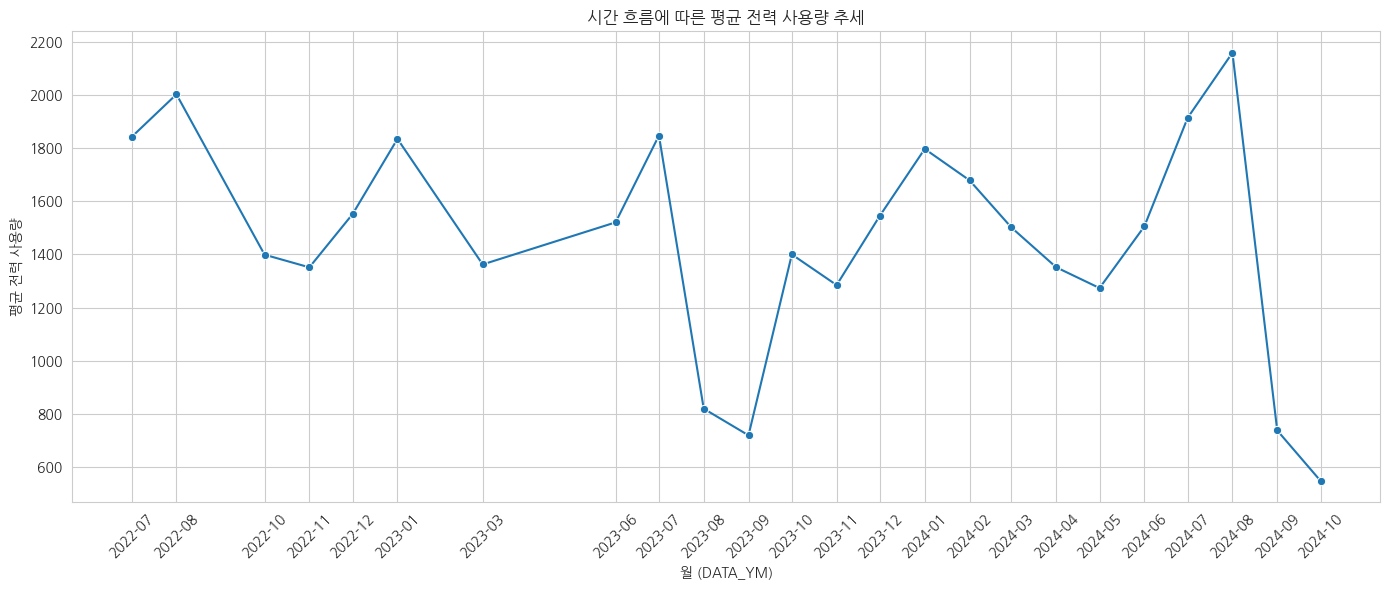

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏõîÎ≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Í≥ÑÏÇ∞
monthly_usage = df.groupby('DATA_YM')['TOTAL_ELEC'].mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values, marker='o')

# XÏ∂ïÏóê Î™®Îì† Ïõî ÌëúÏãú
plt.xticks(ticks=monthly_usage.index, labels=monthly_usage.index.strftime('%Y-%m'), rotation=45)

plt.title('ÏãúÍ∞Ñ ÌùêÎ¶ÑÏóê Îî∞Î•∏ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï∂îÏÑ∏')
plt.xlabel('Ïõî (DATA_YM)')
plt.ylabel('ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ')
plt.grid(True)
plt.tight_layout()
plt.show()


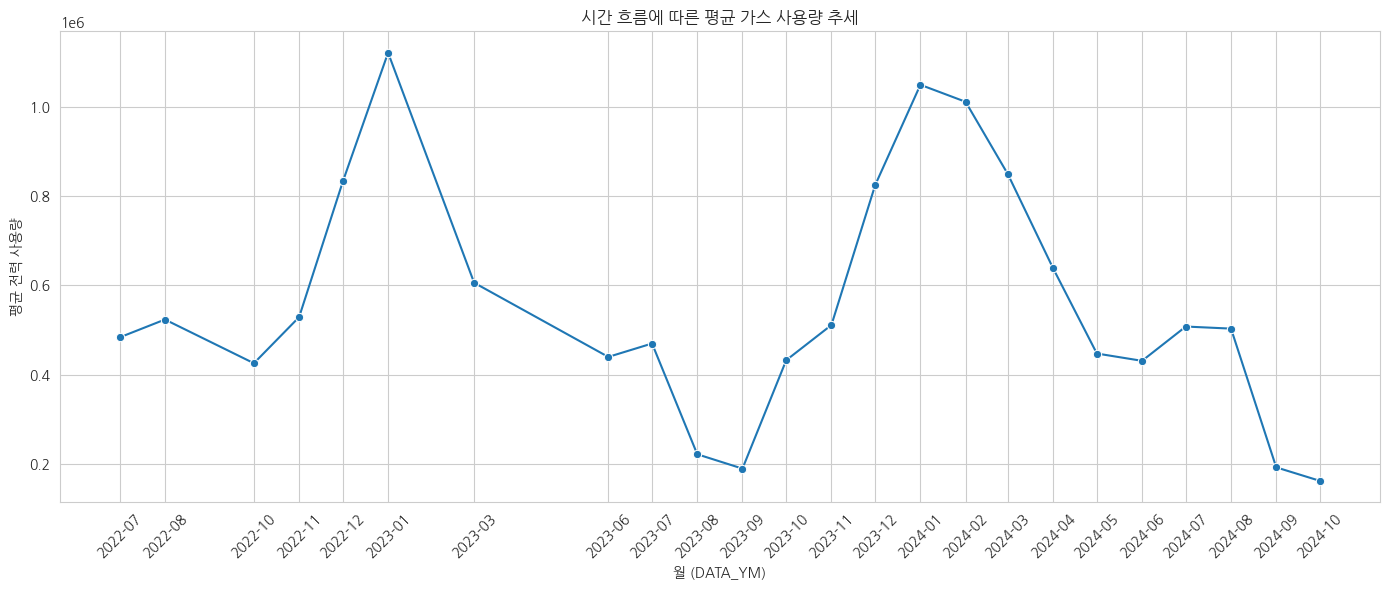

In [182]:

# ÏõîÎ≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Í≥ÑÏÇ∞
monthly_usage = df.groupby('DATA_YM')['TOTAL_GAS'].mean()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values, marker='o')

# XÏ∂ïÏóê Î™®Îì† Ïõî ÌëúÏãú
plt.xticks(ticks=monthly_usage.index, labels=monthly_usage.index.strftime('%Y-%m'), rotation=45)

plt.title('ÏãúÍ∞Ñ ÌùêÎ¶ÑÏóê Îî∞Î•∏ ÌèâÍ∑† Í∞ÄÏä§ ÏÇ¨Ïö©Îüâ Ï∂îÏÑ∏')
plt.xlabel('Ïõî (DATA_YM)')
plt.ylabel('ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ')
plt.grid(True)
plt.tight_layout()
plt.show()


### Ï†ÑÍ∏∞
‚úÖ Ï£ºÏöî Ìå®ÌÑ¥:

Ïó¨Î¶Ñ (7~8Ïõî): Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Í∏âÏ¶ù, ÏóêÏñ¥Ïª® Îì± ÎÉâÎ∞© ÏàòÏöî ÎïåÎ¨∏Ïùº ÌôïÎ•† ÌÅº.

Í∞ÄÏùÑ (9~10Ïõî): Í∏âÍ∞ê ‚Üí ÎÉâÎ∞©ÎèÑ ÎÇúÎ∞©ÎèÑ Í±∞Ïùò ÏóÜÎäî Í≥ÑÏ†àÏù¥Îùº ÏÇ¨Ïö©Îüâ ÏµúÏÜå.

Í≤®Ïö∏ (12~2Ïõî): Îã§ÏÜå ÏÉÅÏäπ, ÎÇúÎ∞©Ïö© Ï†ÑÍ∏∞ ÏàòÏöîÎ°ú Ìï¥ÏÑù Í∞ÄÎä•.

Î¥Ñ (3~5Ïõî): ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ìé∏. Ï†ÑÍ∏∞ ÏÇ¨Ïö© ÏàòÏöîÍ∞Ä ÎßéÏßÄ ÏïäÏùÄ Í≥ÑÏ†à.

Ï†ÑÏ≤¥ ÌùêÎ¶Ñ: Ïó¨Î¶Ñ ÌîºÌÅ¨ - Í∞ÄÏùÑ Ï†ÄÏ†ê - Í≤®Ïö∏ Ï§ëÍ∞Ñ - Î¥Ñ Ï†ÄÏ†ê ÌòïÌÉú Î∞òÎ≥µ.

### Í∞ÄÏä§
‚úÖ Ï£ºÏöî Ìå®ÌÑ¥:
11Ïõî ~ 3Ïõî (Í≤®Ïö∏Ï≤†) ÌîºÌÅ¨

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
#sns.set_style('whitegrid')

plt.figure(figsize=(14, 6))

# ÏãúÍ∞ÅÌôî
sns.barplot(data=df, x='SIDO_NM', y='TOTAL_ELEC', estimator='mean', ci=None, palette='viridis')

# Î†àÏù¥Î∏î ÌöåÏ†Ñ Î∞è Ï†úÎ™©
plt.xticks(rotation=45)
plt.title('ÏßÄÏó≠Î≥Ñ ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ ÎπÑÍµê')
plt.ylabel('ÌèâÍ∑† Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ')
plt.xlabel('ÏßÄÏó≠ (SIDO_NM)')

plt.tight_layout()
plt.show()


C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\3995804323.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='SIDO_NM', y='TOTAL_ELEC', estimator='mean', ci=None, palette='viridis')
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\3995804323.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SIDO_NM', y='TOTAL_ELEC', estimator='mean', ci=None, palette='viridis')


In [184]:
# 6. Í≥ÑÏ†àÎ≥ÄÏàò ÏÉùÏÑ±
# Ïõî Ï∂îÏ∂ú
df['MONTH'] = df['DATA_YM'].dt.month

# Í≥ÑÏ†à Î≥ÄÏàò ÎßåÎì§Í∏∞
def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'

df['SEASON'] = df['MONTH'].apply(get_season)

In [185]:
# pandasÏùò get_dummies ÏÇ¨Ïö©
season_ohe = pd.get_dummies(df['SEASON'], prefix='SEASON')

# Í∏∞Ï°¥ dfÏóê Î∂ôÏù¥Í∏∞
df = pd.concat([df, season_ohe], axis=1)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25344 entries, 0 to 26098
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATA_YM       25344 non-null  datetime64[ns]
 1   AREA_ID       25344 non-null  int64         
 2   AREA_NM       25344 non-null  object        
 3   DIST_CD       25344 non-null  object        
 4   DIST_NM       25344 non-null  object        
 5   TOTAL_BIDG    25344 non-null  float64       
 6   FAC_NEIGH_1   25344 non-null  float64       
 7   FAC_NEIGH_2   25344 non-null  float64       
 8   FAC_CULT_MTG  25344 non-null  float64       
 9   FAC_RELG      25344 non-null  float64       
 10  FAC_RETAIL    25344 non-null  float64       
 11  FAC_MEDI      25344 non-null  float64       
 12  FAC_YOSE      25344 non-null  float64       
 13  FAC_TRAIN     25344 non-null  float64       
 14  FAC_SPORT     25344 non-null  float64       
 15  FAC_STAY      25344 non-null  float64    

## 1. Í±¥Î¨ºÍµ¨ÏÑ± Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ : CLUSTER_BLDG_TYPE

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

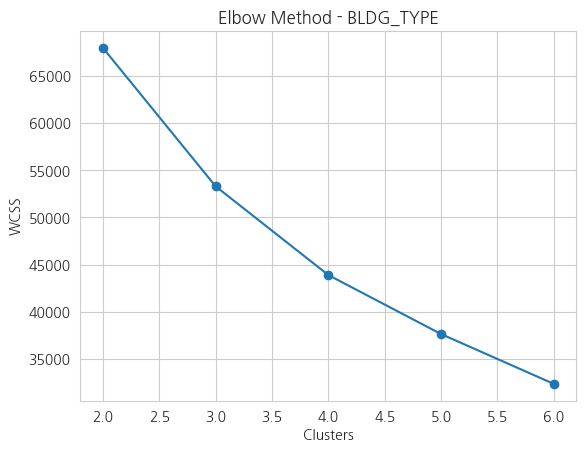

C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


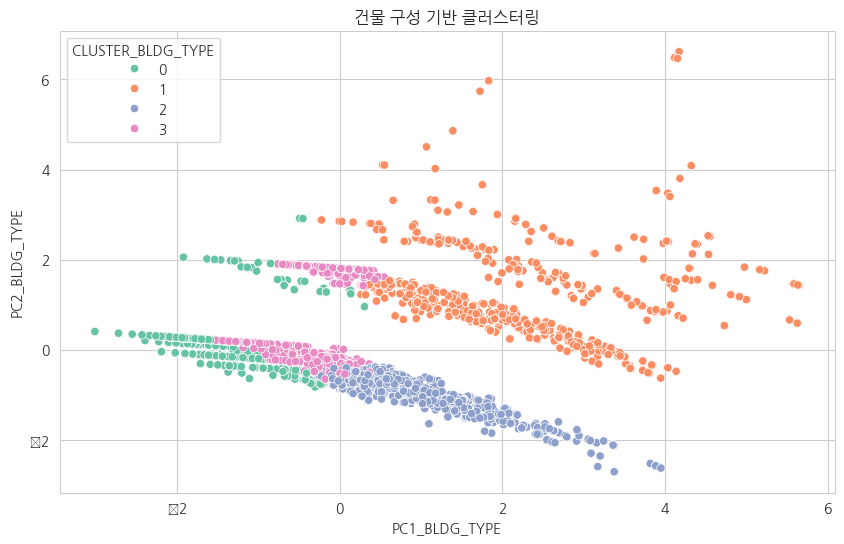

In [188]:
# 1) ÏàòÏπòÌòï Î≥ÄÏàòÎßå Í≥®ÎùºÏÑú Î°úÍ∑∏ Î≥ÄÌôò
features_bldg = ['TOTAL_BIDG', 'FAC_RETAIL', 'FAC_STAY', 'FAC_CULT_MTG']
df_log = df.copy()
df_log[features_bldg] = df_log[features_bldg].apply(lambda col: np.log1p(col))

# 2) Î≥ÄÌôòÎêú df_log Î°ú Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_bldg = scaler.fit_transform(df_log[features_bldg])

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_bldg = scaler.fit_transform(df_log[features_bldg])

# 3. Elbow Method
wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_bldg)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 7), wcss, marker='o')
plt.title('Elbow Method - BLDG_TYPE')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∞è ÏãúÍ∞ÅÌôî
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['CLUSTER_BLDG_TYPE'] = kmeans.fit_predict(X_bldg)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_bldg)
df['PC1_BLDG_TYPE'] = pca_result[:, 0]
df['PC2_BLDG_TYPE'] = pca_result[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PC1_BLDG_TYPE', y='PC2_BLDG_TYPE', hue='CLUSTER_BLDG_TYPE', palette='Set2')
plt.title('Í±¥Î¨º Íµ¨ÏÑ± Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ')
plt.grid(True)
plt.show()


## 2. Í≥ÑÏ†à + Ïó∞ÎèÑ Ï°∞Ìï© Í∏∞Î∞ò gas ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ CLUSTER_SEASONAL

C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE 

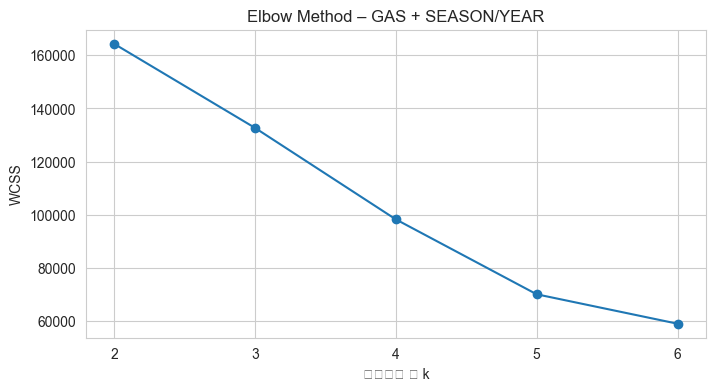

C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RY

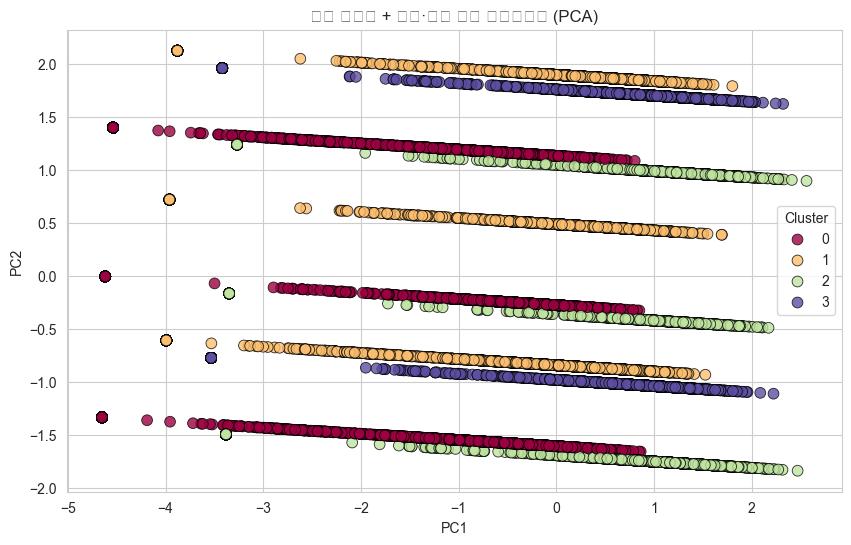

In [189]:
# seaborn Ïä§ÌÉÄÏùº
sns.set_style("whitegrid")

# 0. (ÏÑ†ÌÉù) Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨: TOTAL_GAS==0 ‚Üí log1p Î¨∏Ï†ú ÏóÜÏúºÎãà ÏÉùÎûµ Í∞ÄÎä•

# 1. Î≥ÄÏàò ÏßÄÏ†ï
features = [
    'TOTAL_GAS', 'CMRC_GAS',
    'SEASON_Î¥Ñ', 'SEASON_Ïó¨Î¶Ñ', 'SEASON_Í∞ÄÏùÑ', 'SEASON_Í≤®Ïö∏',
    'YEAR_2023', 'YEAR_2024'
]

# 2. Î°úÍ∑∏Î≥ÄÌôò (Í∞ÄÏä§Îßå)
df_log = df.copy()
df_log[['TOTAL_GAS','CMRC_GAS']] = df_log[['TOTAL_GAS','CMRC_GAS']].apply(lambda x: np.log1p(x))

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X = scaler.fit_transform(df_log[features])

# 4. Elbow Method (k=2~6)
wcss = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,7), wcss, marker='o')
plt.title('Elbow Method ‚Äì GAS + SEASON/‚ÄãYEAR')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò k')
plt.ylabel('WCSS')
plt.xticks(range(2,7))
plt.grid(True)
plt.show()

# 5. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: k=3)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df['CLUSTER_GAS_SEASON'] = kmeans.fit_predict(X)

# 6. PCA 2Ï∞®Ïõê Ìà¨ÏòÅ
pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X)
df['PC1_GAS_SEASON'] = pc[:,0]
df['PC2_GAS_SEASON'] = pc[:,1]

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1_GAS_SEASON', y='PC2_GAS_SEASON',
    hue='CLUSTER_GAS_SEASON', palette='Spectral',
    data=df, s=60, alpha=0.8, edgecolor='k'
)
plt.title('Í∞ÄÏä§ ÏÇ¨Ïö©Îüâ + Í≥ÑÏ†à¬∑Ïó∞ÎèÑ Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


## 3. Ï¢ÖÌï© ÏûÖÏßÄ ÌäπÏÑ± Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ CLUSTER_REGION_MIXED

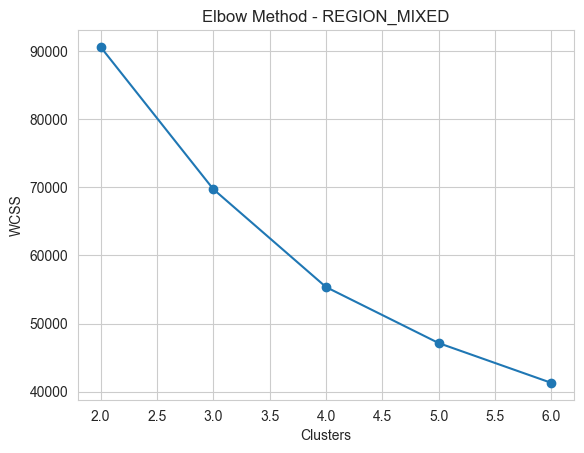

C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dlwng\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TE

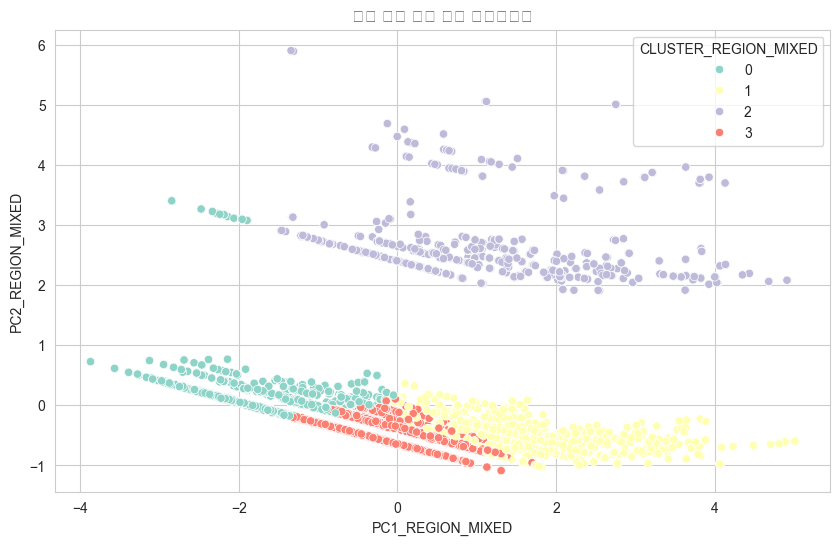

In [190]:
# 1. Î≥ÄÏàò ÏÑ†ÌÉù
features_mix = ['TOTAL_BIDG', 'FAC_RETAIL', 'FAC_NEIGH_1', 'FAC_MEDI', 'FAC_SPORT']
df_log = df.copy()
df_log[features_mix] = df_log[features_mix].apply(lambda x: np.log1p(x))

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_mix = scaler.fit_transform(df_log[features_mix])

# 3. Elbow Method
wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_mix)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 7), wcss, marker='o')
plt.title('Elbow Method - REGION_MIXED')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∞è ÏãúÍ∞ÅÌôî
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['CLUSTER_REGION_MIXED'] = kmeans.fit_predict(X_mix)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_mix)
df['PC1_REGION_MIXED'] = pca_result[:, 0]
df['PC2_REGION_MIXED'] = pca_result[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PC1_REGION_MIXED', y='PC2_REGION_MIXED', hue='CLUSTER_REGION_MIXED', palette='Set3')
plt.title('Ï¢ÖÌï© ÏûÖÏßÄ ÌäπÏÑ± Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ')
plt.grid(True)
plt.show()


In [191]:
df['GAS_PER_BUILDING'] = df['TOTAL_GAS'] / df['TOTAL_BIDG']
df['CMRC_GAS_RATIO']   = df['CMRC_GAS']  / df['TOTAL_GAS']


In [192]:
# TOTAL_BIDGÍ∞Ä 0Ïù¥Î©¥ÏÑú TOTAL_GAS > 0Ïù∏ ÌñâÎßå Í≥®Îùº Î≥¥Í∏∞
anomalies = df[(df['TOTAL_GAS'] == 0) & (df['TOTAL_BIDG']>1 )]
anomalies[['AREA_ID','DIST_CD','TOTAL_BIDG','CMRC_GAS','TOTAL_GAS','TOTAL_ELEC']]

AREA_ID DIST_CD  TOTAL_BIDG  CMRC_GAS  TOTAL_GAS  TOTAL_ELEC
8         9684   47930       173.0         0          0      49.677
30        9936   41590         3.0         0          0       5.407
57        9577   48240        81.0         0          0     307.454
64        9800   50130       110.0         0          0     343.153
70       10272   43720       350.0         0          0     478.860
...        ...     ...         ...       ...        ...         ...
26061     9409   42150       407.0         0          0    1771.946
26062     9556   48740       110.0         0          0     179.969
26070     9682   47770        84.0         0          0       6.112
26088    10365   51810        91.0         0          0     191.063
26094     9816   52113        85.0         0          0       0.000

[1497 rows x 6 columns]

In [193]:
# seaborn Ïä§ÌÉÄÏùº
sns.set_style("whitegrid")

# ‚îÄ‚îÄ 0. Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏõêÎ≥∏ Ïú†ÏßÄ) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc = df.copy()

# ‚îÄ‚îÄ 1. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨: Í±¥Î¨º Ïàò 0Ïù¥Î©¥ÏÑú Í∞ÄÏä§ ÎòêÎäî Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ>0Ïù∏ Í≤ΩÏö∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mask_anom = (df_proc['TOTAL_BIDG'] == 0) & (
    (df_proc['TOTAL_GAS'] > 0) | (df_proc['TOTAL_ELEC'] > 0)
)
print(f"Ïù¥ÏÉÅÏπò Ìñâ Í∞úÏàò: {mask_anom.sum()}Í∞ú")
# ÏµúÏÜå 1Í∞ú Í±¥Î¨ºÎ°ú ÏπòÌôò
df_proc.loc[mask_anom, 'TOTAL_BIDG'] = 1

# ‚îÄ‚îÄ 2. ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc['GAS_PER_BUILDING'] = df_proc['TOTAL_GAS'] / df_proc['TOTAL_BIDG']
df_proc['CMRC_GAS_RATIO']   = df_proc['CMRC_GAS']  / df_proc['TOTAL_GAS'].replace(0, np.nan)

## ‚îÄ‚îÄ 3. inf/NaN Ï†úÍ±∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc.replace([np.inf, -np.inf], np.nan, inplace=True)
#df_proc.dropna(subset=['GAS_PER_BUILDING', 'CMRC_GAS_RATIO'], inplace=True)

Ïù¥ÏÉÅÏπò Ìñâ Í∞úÏàò: 0Í∞ú


In [194]:
# 1. Í∞Å Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò ÌôïÏù∏
print("Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò:")
print(df_proc.isna().sum())

# 2. NaNÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Ìñâ Í∞úÏàò ÌôïÏù∏
num_rows_with_nan = df_proc.isna().any(axis=1).sum()
print(f"\nNaNÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Ìñâ Í∞úÏàò: {num_rows_with_nan}")

# 3. NaNÏù¥ ÏûàÎäî ÏÉòÌîå Ìñâ ÏùºÎ∂Ä Ï∂úÎ†•
print("\nNaN Ìè¨Ìï®Îêú Ìñâ ÏòàÏãú:")
print(df_proc[df_proc.isna().any(axis=1)].head())

# 4. GAS_PER_BUILDING ÎòêÎäî CMRC_GAS_RATIOÏóêÏÑú NaN Î∞úÏÉù Ïù∏Îç±Ïä§ ÌôïÏù∏
nan_indices = df_proc[
    df_proc['GAS_PER_BUILDING'].isna() |
    df_proc['CMRC_GAS_RATIO'].isna()
].index
print("\nÌååÏÉùÎ≥ÄÏàò NaN Î∞úÏÉù Ïù∏Îç±Ïä§:")
print(nan_indices.tolist())


Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò:
DATA_YM                    0
AREA_ID                    0
AREA_NM                    0
DIST_CD                    0
DIST_NM                    0
TOTAL_BIDG                 0
FAC_NEIGH_1                0
FAC_NEIGH_2                0
FAC_CULT_MTG               0
FAC_RELG                   0
FAC_RETAIL                 0
FAC_MEDI                   0
FAC_YOSE                   0
FAC_TRAIN                  0
FAC_SPORT                  0
FAC_STAY                   0
FAC_LEISURE                0
TOTAL_GAS                  0
CMRC_GAS                   0
TOTAL_ELEC                 0
SIDO_CD                    0
ADDR_CD                    0
SIDO_NM                    0
YEAR_2022                  0
YEAR_2023                  0
YEAR_2024                  0
MONTH                      0
SEASON                     0
SEASON_Í∞ÄÏùÑ                  0
SEASON_Í≤®Ïö∏                  0
SEASON_Î¥Ñ                   0
SEASON_Ïó¨Î¶Ñ                  0
CLUSTER_BLDG_TYPE          0
PC1_BLD

In [195]:
# seaborn Ïä§ÌÉÄÏùº
sns.set_style("whitegrid")

# ‚îÄ‚îÄ 0. Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨ (ÏõêÎ≥∏ Ïú†ÏßÄ) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc = df.copy()

# ‚îÄ‚îÄ 1. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨: Í±¥Î¨º Ïàò 0Ïù¥Î©¥ÏÑú Í∞ÄÏä§ ÎòêÎäî Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ>0Ïù∏ Í≤ΩÏö∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mask_anom = (df_proc['TOTAL_BIDG'] == 0) & (
    (df_proc['TOTAL_GAS'] > 0) | (df_proc['TOTAL_ELEC'] > 0)
)
print(f"Ïù¥ÏÉÅÏπò Ìñâ Í∞úÏàò: {mask_anom.sum()}Í∞ú")
# ÏµúÏÜå 1Í∞ú Í±¥Î¨ºÎ°ú ÏπòÌôò
df_proc.loc[mask_anom, 'TOTAL_BIDG'] = 1

# ‚îÄ‚îÄ 2. ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc['GAS_PER_BUILDING'] = df_proc['TOTAL_GAS'] / df_proc['TOTAL_BIDG']
df_proc['CMRC_GAS_RATIO']   = df_proc['CMRC_GAS']  / df_proc['TOTAL_GAS'].replace(0, np.nan)

## ‚îÄ‚îÄ 3. inf/NaN Ï†úÍ±∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_proc.replace([np.inf, -np.inf], np.nan, inplace=True)
#df_proc.dropna(subset=['GAS_PER_BUILDING', 'CMRC_GAS_RATIO'], inplace=True)

# ‚îÄ‚îÄ 4. Î°úÍ∑∏Î≥ÄÌôò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
features = ['GAS_PER_BUILDING', 'CMRC_GAS_RATIO']
df_proc[features] = df_proc[features].apply(np.log1p)

# ‚îÄ‚îÄ 5. Ïä§ÏºÄÏùºÎßÅ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
scaler = StandardScaler()
X_ratio = scaler.fit_transform(df_proc[features])

# ‚îÄ‚îÄ 6. Elbow Method (k=2~6) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
wcss = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_ratio)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,7), wcss, marker='o')
plt.title('Elbow Method ‚Äì GAS_PER_BUILDING & CMRC_GAS_RATIO')
plt.xlabel('Number of Clusters k')
plt.ylabel('WCSS')
plt.xticks(range(2,7))
plt.grid(True)
plt.show()

# ‚îÄ‚îÄ 7. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: k=3) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
k_opt = 4
km_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_proc['CLUSTER_GAS_BLDG'] = km_final.fit_predict(X_ratio)

# ‚îÄ‚îÄ 8. PCA 2D Ìà¨ÏòÅ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
pca = PCA(n_components=2, random_state=42)
pca_res = pca.fit_transform(X_ratio)
df_proc['PC1_GAS_BLDG'] = pca_res[:,0]
df_proc['PC2_GAS_BLDG'] = pca_res[:,1]

# ‚îÄ‚îÄ 9. ÏãúÍ∞ÅÌôî ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1_GAS_BLDG', y='PC2_GAS_BLDG',
    hue='CLUSTER_GAS_BLDG', palette='Accent',
    data=df_proc, s=60, alpha=0.8, edgecolor='k'
)
plt.title('Í∞ÄÏä§/Í±¥Î¨º ÎπÑÏú® Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

Ïù¥ÏÉÅÏπò Ìñâ Í∞úÏàò: 0Í∞ú


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [197]:
df

DATA_YM  AREA_ID      AREA_NM DIST_CD  DIST_NM  TOTAL_BIDG  \
0     2023-03-01     9626       Ï§ëÏïôÎ°úÏó≠_4   27110       Ï§ëÍµ¨       538.0   
1     2023-03-01    10350         Ìô©Î¶¨Îã®Í∏∏   47130      Í≤ΩÏ£ºÏãú       765.0   
2     2022-12-01     9547         ÎÜçÏÜå1Îèô   31200       Î∂ÅÍµ¨       343.0   
3     2023-12-01     9995       Ïã¨ÏÑùÍ≥†Îì±ÌïôÍµê   41360     ÎÇ®ÏñëÏ£ºÏãú       129.0   
4     2023-01-01     9248          Í≥†ÎçïÏó≠   11740      Í∞ïÎèôÍµ¨        34.0   
...          ...      ...          ...     ...      ...         ...   
26094 2023-12-01     9816       ÏïÑÏ§ëÍ≥†Î†§Î≥ëÏõê   52113  Ï†ÑÏ£ºÏãú ÎçïÏßÑÍµ¨        85.0   
26095 2023-07-01    10150      Î∂ÄÌèâÎ¨∏ÌôîÏùòÍ±∞Î¶¨   28237      Î∂ÄÌèâÍµ¨       334.0   
26096 2023-07-01     9860  Í≥†Ï∞ΩÍ≥µÏö©Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê_2   45790      Í≥†Ï∞ΩÍµ∞       311.0   
26097 2022-11-01    10257         ÌôàÌîåÎü¨Ïä§   43113  Ï≤≠Ï£ºÏãú Ìù•ÎçïÍµ¨        62.0   
26098 2024-04-01    10196          ÌÉúÌèâÎèô   30140       Ï§ëÍµ¨       262.0   

       FAC_NEIGH_1  FAC_NEIGH_2  FAC_CULT_MTG  FAC_RELG  ...  PC1_BLDG_TYPE  \
0            266.0         88.0           6.0       3.0  ...       4.031227   
1             72.0        174.0           1.0       0.0  ...       1.920070   
2             74.0        161.0           1.0       3.0  ...       0.231858   
3              4.0         14.0           0.0       1.0  ...      -0.972662   
4              2.0         14.0           0.0       0.0  ...      -0.992184   
...            ...          ...           ...       ...  ...            ...   
26094         13.0         16.0           0.0       0.0  ...       1.414368   
26095        155.0         81.0           0.0       0.0  ...       1.465786   
26096        135.0         30.0           0.0       1.0  ...       0.572957   
26097          9.0          4.0           0.0       0.0  ...      -1.275156   
26098         36.0         56.0           0.0       2.0  ...       0.932313   

       PC2_BLDG_TYPE  CLUSTER_GAS_SEASON  PC1_GAS_SEASON  PC2_GAS_SEASON  \
0           3.476904                   3        1.023197       -1.041213   
1           0.820769                   3        0.874141       -1.032442   
2           1.777699                   2        1.386540       -0.444082   
3           0.143751                   2        0.903225       -1.746413   
4          -0.197605                   2        1.515583       -1.782532   
...              ...                 ...             ...             ...   
26094      -1.355333                   2       -3.381792       -1.494857   
26095      -1.168492                   1        0.570735       -0.877016   
26096      -0.644242                   1       -0.120183       -0.836431   
26097       0.182884                   0       -0.682611       -0.236567   
26098      -0.852112                   3        0.858285        1.708409   

       CLUSTER_REGION_MIXED  PC1_REGION_MIXED  PC2_REGION_MIXED  \
0                         1          3.026374         -0.754404   
1                         1          1.528829         -0.732473   
2                         1          1.370235         -0.733799   
3                         3         -1.066976         -0.283563   
4                         0         -1.414119          0.128598   
...                     ...               ...               ...   
26094                     2          0.978981          2.752424   
26095                     1          1.484494         -0.702536   
26096                     3          1.138207         -0.748084   
26097                     3         -1.094096         -0.261178   
26098                     3          0.519062         -0.542125   

       GAS_PER_BUILDING  CMRC_GAS_RATIO  
0            961.933086        0.900584  
1            421.805229        0.985937  
2           2687.588921        0.788487  
3           1752.674419        0.990522  
4          55436.882353        0.470211  
...                 ...             ...  
26094          0.000000      

In [198]:
# df_procÏùò NaN Í∞í ÌôïÏù∏ ÏΩîÎìú

# 1) Í∞Å Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò ÌôïÏù∏
print("Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò:")
print(df_proc.isna().sum())

# 2) Ï†ÑÏ≤¥ NaNÏù¥ ÏûàÎäî Ìñâ Í∞úÏàò ÌôïÏù∏
num_rows_with_nan = df_proc.isna().any(axis=1).sum()
print(f"\nNaNÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Ìñâ Í∞úÏàò: {num_rows_with_nan}")

# 3) NaNÏù¥ ÏûàÎäî Ìñâ ÏÉòÌîå ÏùºÎ∂Ä Ï∂úÎ†•
print("\nNaNÏù¥ ÏûàÎäî Ìñâ ÏÉòÌîå:")
display(df_proc[df_proc.isna().any(axis=1)].head())

# 4) ÌäπÏ†ï ÌååÏÉùÎ≥ÄÏàò Ïª¨ÎüºÏùò NaN Ïù∏Îç±Ïä§ Ï∂úÎ†• (Ïòà: GAS_PER_BUILDING, CMRC_GAS_RATIO)
nan_indices = df_proc[df_proc['GAS_PER_BUILDING'].isna() | df_proc['CMRC_GAS_RATIO'].isna()].index
print("\nÌååÏÉùÎ≥ÄÏàò NaN Î∞úÏÉù Ïù∏Îç±Ïä§:")
print(nan_indices.to_list())


Ïª¨ÎüºÎ≥Ñ NaN Í∞úÏàò:
DATA_YM                    0
AREA_ID                    0
AREA_NM                    0
DIST_CD                    0
DIST_NM                    0
TOTAL_BIDG                 0
FAC_NEIGH_1                0
FAC_NEIGH_2                0
FAC_CULT_MTG               0
FAC_RELG                   0
FAC_RETAIL                 0
FAC_MEDI                   0
FAC_YOSE                   0
FAC_TRAIN                  0
FAC_SPORT                  0
FAC_STAY                   0
FAC_LEISURE                0
TOTAL_GAS                  0
CMRC_GAS                   0
TOTAL_ELEC                 0
SIDO_CD                    0
ADDR_CD                    0
SIDO_NM                    0
YEAR_2022                  0
YEAR_2023                  0
YEAR_2024                  0
MONTH                      0
SEASON                     0
SEASON_Í∞ÄÏùÑ                  0
SEASON_Í≤®Ïö∏                  0
SEASON_Î¥Ñ                   0
SEASON_Ïó¨Î¶Ñ                  0
CLUSTER_BLDG_TYPE          0
PC1_BLD

DATA_YM  AREA_ID  AREA_NM DIST_CD DIST_NM  TOTAL_BIDG  FAC_NEIGH_1  \
8  2023-03-01     9684      Ï£ΩÎ≥ÄÎ©¥   47930     Ïö∏ÏßÑÍµ∞       173.0         15.0   
17 2024-10-01    10317  ÌåîÍ≥µÏÇ∞ ÎèôÌôîÏÇ¨   27140      ÎèôÍµ¨         0.0          0.0   
30 2024-09-01     9936     ÏÇ¨Í∞ïÏãúÏû•   41590     ÌôîÏÑ±Ïãú         3.0          0.0   
57 2023-09-01     9577      Ï§ëÏïôÎ°ú   48240     ÏÇ¨Ï≤úÏãú        81.0          8.0   
64 2023-11-01     9800      ÎèôÌù•Îèô   50130    ÏÑúÍ∑ÄÌè¨Ïãú       110.0         15.0   

    FAC_NEIGH_2  FAC_CULT_MTG  FAC_RELG  ...  PC1_BLDG_TYPE  PC2_BLDG_TYPE  \
8          10.0           0.0       0.0  ...      -0.850929       0.128003   
17          0.0           0.0       0.0  ...      -3.005239       0.406698   
30          2.0           0.0       0.0  ...      -2.426353       0.331810   
57         29.0           0.0       0.0  ...       0.218934      -0.528990   
64         30.0           1.0       0.0  ...      -0.240470       1.838802   

    CLUSTER_GAS_SEASON  PC1_GAS_SEASON  PC2_GAS_SEASON  CLUSTER_REGION_MIXED  \
8                    3       -3.533775       -0.773670                     3   
17                   0       -4.537317        1.399058                     0   
30                   0       -4.537317        1.399058                     0   
57                   0       -4.650839       -1.334286                     3   
64                   0       -4.650839       -1.334286                     3   

    PC1_REGION_MIXED  PC2_REGION_MIXED  GAS_PER_BUILDING  CMRC_GAS_RATIO  
8          -0.452982         -0.490084               0.0             NaN  
17         -3.870039          0.725192               NaN             NaN  
30         -3.263406          0.500674               0.0             NaN  
57         -1.022815         -0.289436               0.0             NaN  
64         -0.649691         -0.417281               0.0             NaN  

[5 rows x 43 columns]


ÌååÏÉùÎ≥ÄÏàò NaN Î∞úÏÉù Ïù∏Îç±Ïä§:
[8, 17, 30, 57, 64, 70, 79, 84, 95, 101, 132, 139, 149, 161, 198, 242, 245, 293, 310, 359, 360, 367, 376, 382, 390, 397, 400, 401, 456, 467, 470, 478, 491, 506, 508, 514, 517, 533, 556, 573, 575, 611, 620, 637, 641, 651, 656, 662, 668, 679, 680, 681, 696, 697, 719, 727, 750, 759, 794, 804, 829, 830, 833, 839, 846, 852, 877, 889, 893, 928, 953, 965, 971, 992, 993, 1009, 1026, 1045, 1049, 1052, 1084, 1087, 1090, 1109, 1119, 1127, 1137, 1145, 1178, 1205, 1222, 1241, 1242, 1246, 1247, 1249, 1258, 1276, 1279, 1296, 1316, 1323, 1338, 1340, 1354, 1368, 1382, 1397, 1421, 1431, 1461, 1466, 1477, 1478, 1479, 1485, 1490, 1494, 1511, 1522, 1544, 1545, 1561, 1579, 1593, 1598, 1636, 1651, 1658, 1670, 1680, 1684, 1690, 1698, 1700, 1710, 1757, 1764, 1766, 1794, 1801, 1808, 1817, 1844, 1851, 1852, 1863, 1869, 1904, 1914, 1926, 1929, 1937, 1960, 1990, 1993, 2009, 2032, 2115, 2129, 2155, 2158, 2163, 2173, 2183, 2203, 2208, 2218, 2219, 2251, 2270, 2279, 2307, 2321, 2343

In [199]:
#from sklearn.metrics import silhouette_score

# Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
#silhouette = silhouette_score(X_train, kmeans.labels_)
#print(f'Silhouette Score: {silhouette}')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25344 entries, 0 to 26098
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA_YM               25344 non-null  datetime64[ns]
 1   AREA_ID               25344 non-null  int64         
 2   AREA_NM               25344 non-null  object        
 3   DIST_CD               25344 non-null  object        
 4   DIST_NM               25344 non-null  object        
 5   TOTAL_BIDG            25344 non-null  float64       
 6   FAC_NEIGH_1           25344 non-null  float64       
 7   FAC_NEIGH_2           25344 non-null  float64       
 8   FAC_CULT_MTG          25344 non-null  float64       
 9   FAC_RELG              25344 non-null  float64       
 10  FAC_RETAIL            25344 non-null  float64       
 11  FAC_MEDI              25344 non-null  float64       
 12  FAC_YOSE              25344 non-null  float64       
 13  FAC_TRAIN            

In [201]:
df.describe()

DATA_YM       AREA_ID    TOTAL_BIDG  \
count                          25344  25344.000000  25344.000000   
mean   2023-08-22 13:10:34.090908928   9740.560646    178.445668   
min              2022-07-01 00:00:00   9138.000000      0.000000   
25%              2023-01-01 00:00:00   9438.000000     51.000000   
50%              2023-09-01 00:00:00   9734.000000    116.000000   
75%              2024-04-01 00:00:00  10040.000000    245.000000   
max              2024-10-01 00:00:00  10376.000000   1530.000000   
std                              NaN    352.207922    188.527093   

        FAC_NEIGH_1   FAC_NEIGH_2  FAC_CULT_MTG      FAC_RELG    FAC_RETAIL  \
count  25344.000000  25344.000000  25344.000000  25344.000000  25344.000000   
mean      44.198351     42.601010      0.289654      0.494634      1.087240   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.000000     10.000000      0.000000      0.000000      0.000000   
50%       19.000000     27.000000      0.000000      0.000000      0.000000   
75%       51.000000     59.000000      0.000000      1.000000      1.000000   
max      553.000000    872.000000     18.000000     15.000000     67.000000   
std       66.751244     51.046922      0.851306      0.945696      2.475609   

           FAC_MEDI      FAC_YOSE  ...  PC1_BLDG_TYPE  PC2_BLDG_TYPE  \
count  25344.000000  25344.000000  ...   2.534400e+04   2.534400e+04   
mean       0.574021      0.580414  ...  -3.252168e-17  -2.803593e-17   
min        0.000000      0.000000  ...  -3.005239e+00  -2.705324e+00   
25%        0.000000      0.000000  ...  -1.016658e+00  -5.159050e-01   
50%        0.000000      0.000000  ...  -2.196360e-01  -4.298711e-02   
75%        1.000000      1.000000  ...   8.141589e-01   2.266905e-01   
max        7.000000      9.000000  ...   5.648708e+00   6.616436e+00   
std        1.047036      1.079050  ...   1.425357e+00   8.877359e-01   

       CLUSTER_GAS_SEASON  PC1_GAS_SEASON  PC2_GAS_SEASON  \
count        25344.000000    2.534400e+04    2.534400e+04   
mean             1.396346    2.803593e-17   -8.550960e-18   
min              0.000000   -4.650839e+00   -1.838426e+00   
25%              0.000000   -4.411551e-01   -1.042536e+00   
50%              1.000000    3.461266e-01   -2.681735e-01   
75%              2.000000    9.557824e-01    1.227648e+00   
max              3.000000    2.561784e+00    2.124364e+00   
std              1.099366    1.427657e+00    1.311382e+00   

       CLUSTER_REGION_MIXED  PC1_REGION_MIXED  PC2_REGION_MIXED  \
count          25344.000000      2.534400e+04      2.534400e+04   
mean               1.751144      1.548985e-17     -1.289653e-17   
min                0.000000     -3.870039e+00     -1.087964e+00   
25%                1.000000     -9.464928e-01     -5.266602e-01   
50%                2.000000     -5.261131e-02     -3.163815e-01   
75%                3.000000      9.082681e-01      2.194147e-02   
max                3.000000      5.014599e+00      5.901750e+00   
std                1.232532      1.527276e+00      9.822832e-01   

       GAS_PER_BUILDING  CMRC_GAS_RATIO  
count      2.511300e+04    23573.000000  
mean       2.018603e+04        0.716091  
min        0.000000e+00        0.000000  
25%        5.418113e+02        0.542140  
50%        2.082021e+03        0.814832  
75%        6.893504e+03        0.970012  
max        1.147081e+07        1.000000  
std        2.087487e+05        0.292951  

[8 rows x 29 columns]

In [202]:
train[train['TOTAL_ELEC']==0].count()

DATA_YM         494
AREA_ID         494
AREA_NM         494
DIST_CD         494
DIST_NM         494
TOTAL_BIDG      494
FAC_NEIGH_1     494
FAC_NEIGH_2     494
FAC_CULT_MTG    494
FAC_RELG        494
FAC_RETAIL      494
FAC_MEDI        494
FAC_YOSE        494
FAC_TRAIN       494
FAC_SPORT       494
FAC_STAY        494
FAC_LEISURE     494
TOTAL_GAS       494
CMRC_GAS        494
TOTAL_ELEC      494
SIDO_CD         494
ADDR_CD         494
SIDO_NM         494
YEAR            494
dtype: int64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25344 entries, 0 to 26098
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATA_YM               25344 non-null  datetime64[ns]
 1   AREA_ID               25344 non-null  int64         
 2   AREA_NM               25344 non-null  object        
 3   DIST_CD               25344 non-null  object        
 4   DIST_NM               25344 non-null  object        
 5   TOTAL_BIDG            25344 non-null  float64       
 6   FAC_NEIGH_1           25344 non-null  float64       
 7   FAC_NEIGH_2           25344 non-null  float64       
 8   FAC_CULT_MTG          25344 non-null  float64       
 9   FAC_RELG              25344 non-null  float64       
 10  FAC_RETAIL            25344 non-null  float64       
 11  FAC_MEDI              25344 non-null  float64       
 12  FAC_YOSE              25344 non-null  float64       
 13  FAC_TRAIN            

# Î™®Îç∏ÎßÅ


In [204]:
# ÌÉÄÍ≤ü ÏÑ§Ï†ï
target = 'TOTAL_ELEC'

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Ïó¥
drop_cols = ['DATA_YM', 'AREA_ID', 'AREA_NM', 'DIST_NM', 'SIDO_CD', 'ADDR_CD', 'SIDO_NM', 'SEASON','CMRC_GAS_RATIO','GAS_PER_BUILDING' ]

# ÌîºÏ≤ò ÏÑ§Ï†ï
features = df.drop(columns=drop_cols + [target]).columns

In [205]:
# Train / Test Î∂ÑÎ¶¨ (train_test_split ÏÇ¨Ïö©)
X = df[features]
y = df[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:

# 1. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î≥ÄÏàòÎì§ (PC~ Î∞è CLUSTER) Ï†úÏô∏Ìïú Î≥ÄÏàòÎì§Îßå ÏÑ†ÌÉù
columns_to_log = ['TOTAL_BIDG', 'FAC_NEIGH_1', 'FAC_NEIGH_2', 'FAC_CULT_MTG', 
                  'FAC_RELG', 'FAC_RETAIL', 'FAC_MEDI', 'FAC_YOSE', 'FAC_TRAIN', 
                  'FAC_SPORT', 'FAC_STAY', 'FAC_LEISURE', 'TOTAL_GAS', 'CMRC_GAS']

# Î°úÍ∑∏Î≥ÄÌôò (log1p ÏÇ¨Ïö©)
X_train_log = X_train.copy()
X_valid_log = X_valid.copy()

for col in columns_to_log:
    X_train_log[col] = np.log1p(X_train_log[col])
    X_valid_log[col] = np.log1p(X_valid_log[col])

In [207]:
# StandardScaler Ï†ÅÏö©
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log[columns_to_log])
X_valid_scaled = scaler.transform(X_valid_log[columns_to_log])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_log)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=columns_to_log)

In [208]:
# PC~, CLUSTER Í≥ÑÏó¥ Î≥ÄÏàòÎäî ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∑∏ÎåÄÎ°ú Î∂ôÏó¨Ï§å
cluster_features = ['CLUSTER_BLDG_TYPE', 'PC1_BLDG_TYPE', 'PC2_BLDG_TYPE', 'CLUSTER_GAS_SEASON', 'PC1_GAS_SEASON', 'PC2_GAS_SEASON','CLUSTER_REGION_MIXED','PC1_REGION_MIXED','PC2_REGION_MIXED']

X_train_scaled[cluster_features] = X_train[cluster_features].reset_index(drop=True)
X_valid_scaled[cluster_features] = X_valid[cluster_features].reset_index(drop=True)


In [219]:
# 5. ÌÉÄÍ≤ü Î°úÍ∑∏Î≥ÄÌôò
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

# 6. ÌèâÍ∞Ä Ìï®Ïàò Ï†ïÏùò
def train_and_evaluate(name, model, X_train, y_train, X_valid, y_valid):
    """
    Î°úÍ∑∏Î≥ÄÌôò ÌïôÏäµ ÌõÑ, Ïó≠Î≥ÄÌôòÎêú Í∞íÏúºÎ°ú Í≤ÄÏ¶ùÏÖã ÌèâÍ∞ÄÍπåÏßÄ Ìïú Î≤àÏóê Ï≤òÎ¶¨.
    
    Parameters:
        name (str): Î™®Îç∏ Ïù¥Î¶Ñ
        model: ÌöåÍ∑Ä Î™®Îç∏ Í∞ùÏ≤¥
        X_train, X_valid: ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (Ïä§ÏºÄÏùºÎßÅÎêú ÏÉÅÌÉú)
        y_train, y_valid: ÏõêÎûò ÌÉÄÍ≤üÍ∞í (Î°úÍ∑∏ Î≥ÄÌôò Ï†Ñ ÏÉÅÌÉúÎ°ú ÎÑ£Í∏∞)
    """
    
    # Î°úÍ∑∏ Î≥ÄÌôò
    y_train_log = np.log1p(y_train)

    # ÌïôÏäµ
    model.fit(X_train, y_train_log)

    # ÏòàÏ∏° (Î°úÍ∑∏ Ïä§ÏºÄÏùº ‚Üí Ïó≠Î≥ÄÌôò)
    y_pred_train_log = model.predict(X_train)
    y_pred_valid_log = model.predict(X_valid)

    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_valid = np.expm1(y_pred_valid_log)

    # ÌèâÍ∞Ä (ÏõêÎûò ÌÉÄÍ≤üÍ≥º ÎπÑÍµê)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)

    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    valid_r2 = r2_score(y_valid, y_pred_valid)
    valid_mae = mean_absolute_error(y_valid, y_pred_valid)

    print(f"\nüìå [{name}] ÏÑ±Îä• ÌèâÍ∞Ä")
    print(f"Train  - RMSE: {train_rmse:.4f}, R¬≤: {train_r2:.4f}, MAE: {train_mae:.4f}")
    print(f"Valid  - RMSE: {valid_rmse:.4f}, R¬≤: {valid_r2:.4f}, MAE: {valid_mae:.4f}")

    return {
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'train_mae': train_mae,
        'valid_rmse': valid_rmse,
        'valid_r2': valid_r2,
        'valid_mae': valid_mae,
        'model': model
    }
# 7. Î™®Îç∏ Ï†ïÏùò
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# 8. Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä Ïã§Ìñâ
train_and_evaluate("XGBoost", xgb_model, X_train_scaled, y_train, X_valid_scaled, y_valid)
train_and_evaluate("RandomForest", rf_model, X_train_scaled, y_train, X_valid_scaled, y_valid)
train_and_evaluate("LightGBM", lgbm_model, X_train_scaled, y_train, X_valid_scaled, y_valid)



üìå [XGBoost] ÏÑ±Îä• ÌèâÍ∞Ä
Train  - RMSE: 462.0553, R¬≤: 0.9503, MAE: 212.5268
Valid  - RMSE: 522.1020, R¬≤: 0.9320, MAE: 261.1084

üìå [RandomForest] ÏÑ±Îä• ÌèâÍ∞Ä
Train  - RMSE: 321.9931, R¬≤: 0.9758, MAE: 113.4581
Valid  - RMSE: 587.8881, R¬≤: 0.9138, MAE: 273.4863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2971
[LightGBM] [Info] Number of data points in the train set: 20275, number of used features: 23
[LightGBM] [Info] Start training from score 6.506804

üìå [LightGBM] ÏÑ±Îä• ÌèâÍ∞Ä
Train  - RMSE: 851.7085, R¬≤: 0.8310, MAE: 371.4252
Valid  - RMSE: 840.4510, R¬≤: 0.8239, MAE: 381.5957


{'train_rmse': 851.7084712085518,
 'train_r2': 0.8309635560145987,
 'train_mae': 371.42522597982133,
 'valid_rmse': 840.4509731732476,
 'valid_r2': 0.8238549784960978,
 'valid_mae': 381.59573423723447,
 'model': LGBMRegressor(random_state=42)}

<Figure size 1000x800 with 0 Axes>

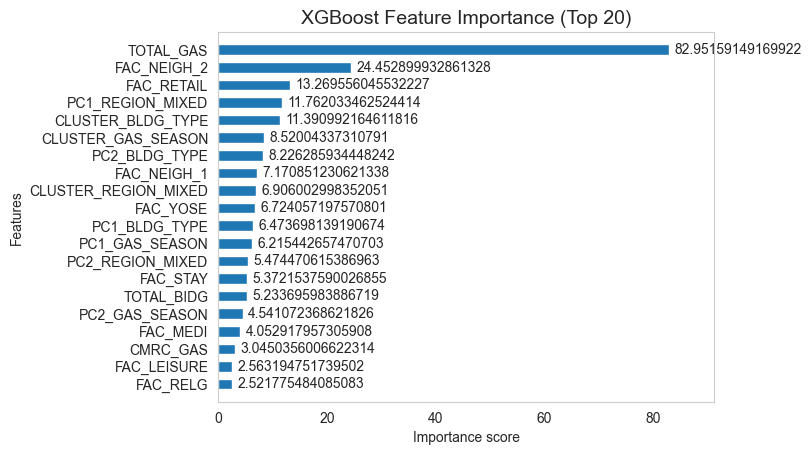

In [210]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# XGBÏ§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain', height=0.6, grid=False)
plt.title('XGBoost Feature Importance (Top 20)', fontsize=14)
plt.show()

In [211]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

In [212]:
#kfold + gridsearchCV

# 1. Ïª§Ïä§ÌÖÄ Ïä§ÏΩîÏñ¥Îü¨ Ï†ïÏùò (expm1 Î≥µÏõê ÌõÑ RMSE)
def rmse_exp_score(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_exp_scorer = make_scorer(rmse_exp_score, greater_is_better=False)

# 2. ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# 3. GridSearchCV ÏÑ§Ï†ï
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=rmse_exp_scorer,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

# 4. Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ ÌïôÏäµ
y_train_log = np.log1p(y_train)
grid_search.fit(X_train_scaled, y_train_log)

# 5. ÏµúÏ†Å Î™®Îç∏ Ï†ïÎ≥¥ Ï∂úÎ†•
print("‚úÖ Best Parameters:", grid_search.best_params_)
print("‚úÖ Best CV RMSE (expm1 Í∏∞Ï§Ä):", -grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
‚úÖ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
‚úÖ Best CV RMSE (expm1 Í∏∞Ï§Ä): 621.8687793091461


In [213]:
# 6. ÏµúÏ†Å Î™®Îç∏ Ï∂îÏ∂ú
best_model = grid_search.best_estimator_

# 7. validation ÏòàÏ∏° + Ïó≠Î≥ÄÌôò
y_pred_valid_log = best_model.predict(X_valid_scaled)
y_pred_valid = np.expm1(y_pred_valid_log)

# 8. ÌèâÍ∞Ä
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
valid_r2 = r2_score(y_valid, y_pred_valid)
valid_mae = mean_absolute_error(y_valid, y_pred_valid)

print(f"\nüìä Validation ÏÑ±Îä• (Best XGB Model)")
print(f"RMSE: {valid_rmse:.4f}, R¬≤: {valid_r2:.4f}, MAE: {valid_mae:.4f}")


üìä Validation ÏÑ±Îä• (Best XGB Model)
RMSE: 523.2556, R¬≤: 0.9317, MAE: 257.6378


In [218]:
# 9. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = best_model.feature_importances_
columns = X_train.columns  # X_trainÏù¥ DataFrameÏùº ÎïåÎßå Í∞ÄÎä•!

importance_df = pd.DataFrame({
    'feature': columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 10. ÏÉÅÏúÑ 20Í∞ú ÏãúÍ∞ÅÌôî
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'].head(top_n)[::-1],
         importance_df['importance'].head(top_n)[::-1])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
# testÏ∂îÏ∂ú
# 1. ÌÖåÏä§Ìä∏ÏÖã ÏòàÏ∏° (Î°úÍ∑∏ Ïä§ÏºÄÏùº ‚Üí Ïó≠Î≥ÄÌôò)
#y_test_pred_log = best_model.predict(X_test_scaled)
#y_test_pred = np.expm1(y_test_pred_log)

# 2. Í≤∞Í≥º Ï†ÄÏû• (DataFrame Íµ¨ÏÑ±)
#submission = pd.DataFrame({
#    'y_pred': y_test_pred
#})

# 3. Ï†ÄÏû• (ÌòïÏãù: csv ÎòêÎäî xlsx)
#submission.to_csv("submission.csv", index=False)
# ÎòêÎäî
# submission.to_excel("submission.xlsx", index=False)

#print("üìÅ ÌÖåÏä§Ìä∏ÏÖã ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: submission.csv")


X_train_scaled_df.shape: (20275, 32)
Number of features (columns): 32
Length of feature_importances_: 23
Feature Í∏∏Ïù¥ Î∂àÏùºÏπò Î∞úÍ≤¨. Î™®Îç∏ Í∏∏Ïù¥Ïóê ÎßûÍ≤å ÌîºÏ≤òÎ™ÖÏùÑ Ïû¨Ï†ïÏùòÌï©ÎãàÎã§.


C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dlwng\AppData\Local\Temp\ipykernel_22804\1045551606.py:39: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) Arial.
  plt.tight_l

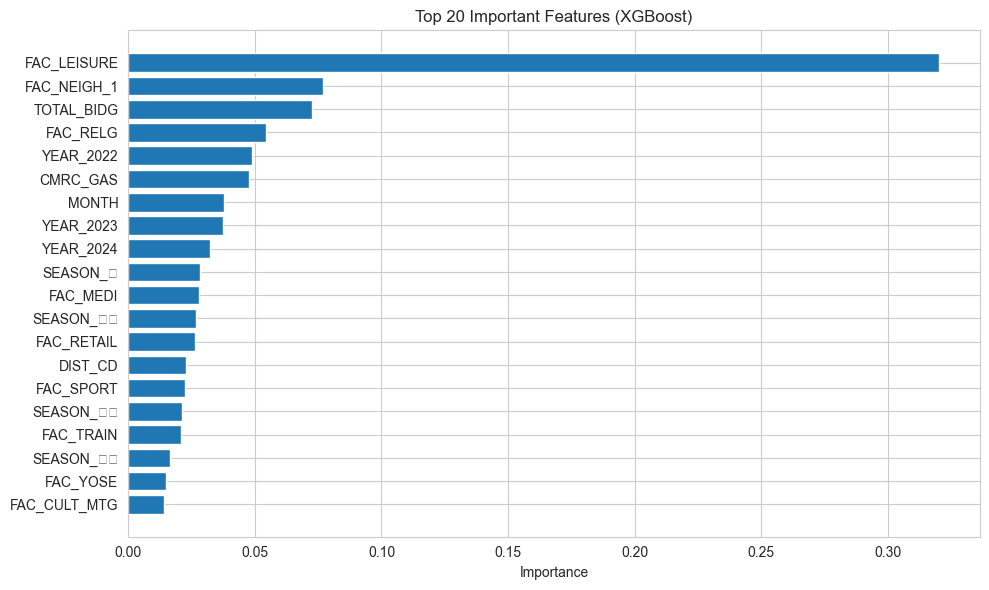


üìä Validation ÏÑ±Îä• (Top 20 Features Í∏∞Ï§Ä)
RMSE: 805.0028, R¬≤: 0.8384, MAE: 360.3719


In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# 1. DataFrame Î≥ÄÌôò (Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÏõêÎûòÏùò Ïª¨ÎüºÎ™Ö Î∂ÄÏó¨)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

# 2. best_modelÏúºÎ°úÎ∂ÄÌÑ∞ feature_importances_ Í∞ÄÏ†∏Ïò§Í∏∞
importances = best_model.feature_importances_

# Îëê Í∏∏Ïù¥ ÌôïÏù∏ÌïòÍ∏∞ (ÎîîÎ≤ÑÍπÖÏö©)
print("X_train_scaled_df.shape:", X_train_scaled_df.shape)
print("Number of features (columns):", len(X_train_scaled_df.columns))
print("Length of feature_importances_:", len(importances))

# 3. ÎßåÏïΩ Í∏∏Ïù¥Í∞Ä Îã§Î•¥Î©¥, Î™®Îç∏ÏóêÏÑú Î∞òÌôòÌïú Í∏∏Ïù¥Ïóê ÎßûÍ≤å Ïª¨ÎüºÎ™ÖÏùÑ Ï°∞Ï†ï
if len(importances) != len(X_train_scaled_df.columns):
    print("Feature Í∏∏Ïù¥ Î∂àÏùºÏπò Î∞úÍ≤¨. Î™®Îç∏ Í∏∏Ïù¥Ïóê ÎßûÍ≤å ÌîºÏ≤òÎ™ÖÏùÑ Ïû¨Ï†ïÏùòÌï©ÎãàÎã§.")
    feature_names = X_train_scaled_df.columns[:len(importances)]
else:
    feature_names = X_train_scaled_df.columns

# 4. Î≥ÄÏàò Ï§ëÏöîÎèÑ DataFrame ÏÉùÏÑ± Î∞è Ï†ïÎ†¨
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 5. ÏãúÍ∞ÅÌôî (ÏÉÅÏúÑ 20Í∞ú ÌîºÏ≤ò)
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'].head(top_n)[::-1],
         importance_df['importance'].head(top_n)[::-1])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Important Features (XGBoost)')
plt.tight_layout()
plt.show()

# 6. ÏÉÅÏúÑ Î≥ÄÏàò Î¶¨Ïä§Ìä∏ ÏÑ†Ï†ï
top_features = importance_df['feature'].head(top_n).tolist()

# 7. ÏÉÅÏúÑ Î≥ÄÏàòÎßå Í≥®Îùº Ïû¨ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_train_top = X_train_scaled_df[top_features]
X_valid_top = X_valid_scaled_df[top_features]

# 8. ÏÉà Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ± (GridSearchCVÏóêÏÑú Ï∞æÏùÄ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïö©)
xgb_top = XGBRegressor(**grid_search.best_params_, random_state=42)
xgb_top.fit(X_train_top, y_train_log)

# 9. Validation setÏóê ÎåÄÌï¥ ÏòàÏ∏° Î∞è Ïó≠Î≥ÄÌôò
y_pred_valid_top_log = xgb_top.predict(X_valid_top)
y_pred_valid_top = np.expm1(y_pred_valid_top_log)

# 10. ÌèâÍ∞Ä
valid_rmse_top = np.sqrt(mean_squared_error(y_valid, y_pred_valid_top))
valid_r2_top = r2_score(y_valid, y_pred_valid_top)
valid_mae_top = mean_absolute_error(y_valid, y_pred_valid_top)

print(f"\nüìä Validation ÏÑ±Îä• (Top {top_n} Features Í∏∞Ï§Ä)")
print(f"RMSE: {valid_rmse_top:.4f}, R¬≤: {valid_r2_top:.4f}, MAE: {valid_mae_top:.4f}")
